In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import scipy as sc
import os
from sklearn.decomposition import PCA

In [3]:
p1 = '/Users/arand/HRDPS_data/gemlam_y2007m02d01.nc'
p2 = '/Users/arand/HRDPS_data/gemlam_y2007m02d02.nc'
p3 = '/Users/arand/HRDPS_data/gemlam_y2007m02d03.nc'
day1 = xr.open_dataset(p1)
day2 = xr.open_dataset(p2)
day3 = xr.open_dataset(p3)


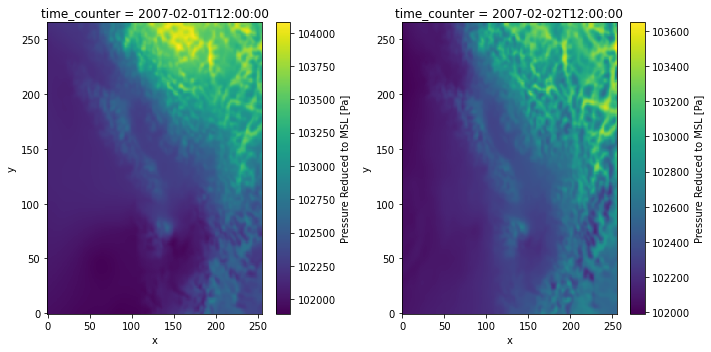

In [8]:
#plots of original data at two timestamps
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
day1.atmpres[12].plot(ax=axs[0])
day2.atmpres[12].plot(ax=axs[1])
fig.tight_layout()

In [9]:
A = day1['atmpres'][0:24, 0:266, 0:256]
B = day2['atmpres'][0:24, 0:266, 0:256]
C = day3['atmpres'][0:24, 0:266, 0:256]

data = xr.concat([A, B, C], dim='time_counter') #contains raw pressure data

## PCA

In [8]:
##data must be converted into a 2D matrix for pca analysis
data2 = np.array(data) 

def transform(arr):
    data3 = np.empty((266*256, 72)) 
    for i in range(72):
        flattened_arr = arr[i, 0:266, 0:256].flatten(order = 'C')
        data3[:, i] = flattened_arr[:]; 
    return data3

def reverse(arr):
    data4 = np.empty((72, 266, 256))
    for i in range(72):
        temp = arr[:,i].reshape(266,256)
        data4[i,:,:] = temp
    return data4

In [ ]:
def conductPCA(data_arr, num_conponents)
    n_modes = np.min(np.shape(data_arr)) 

    data_matrix = transform(data_arr)
    pca = PCA(n_components = num_conponents)
    PCs = pca.fit_transform(data3)
    eigvecs = pca.components_
    fracVar = pca.explained_variance_ratio_

    conponents = pca.transform(data3)
    new_mat = pca.inverse_transform(conponents)
    data4 = reverse(new_mat)

In [11]:
n_modes = np.min(np.shape(data)) ##72 in this case

data3 = transform(data2)
pca = PCA(n_components = 3)
PCs = pca.fit_transform(data3)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

conponents = pca.transform(data3)
new_mat = pca.inverse_transform(conponents)
data4 = reverse(new_mat)

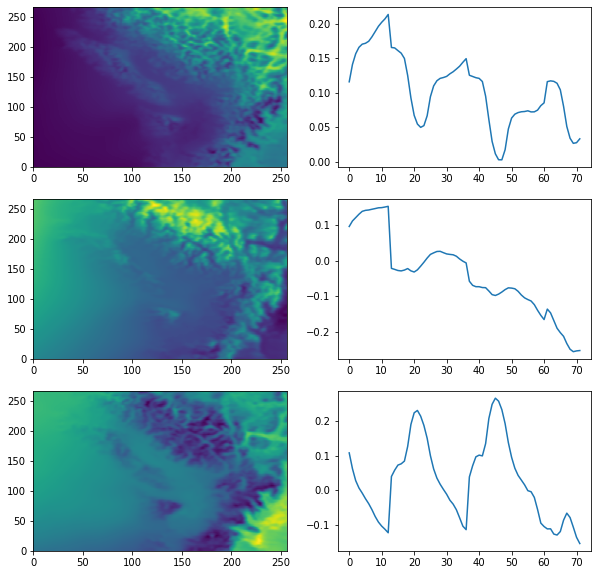

In [12]:
#displaying first 3 principle conponents and time-loading
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
mode0 = PCs[:, 0].reshape(266,256)
mode1 = PCs[:, 1].reshape(266,256)
mode2 = PCs[:, 2].reshape(266,256)
ax[0, 0].pcolormesh(mode0)
ax[0, 1].plot(eigvecs[0])
ax[1, 0].pcolormesh(mode1)
ax[1, 1].plot(eigvecs[1])
ax[2, 0].pcolormesh(mode2)
ax[2, 1].plot(eigvecs[2])

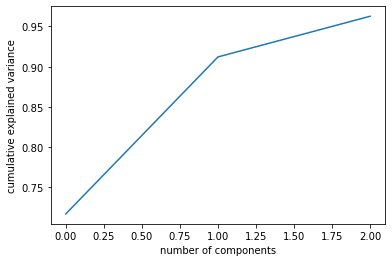

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

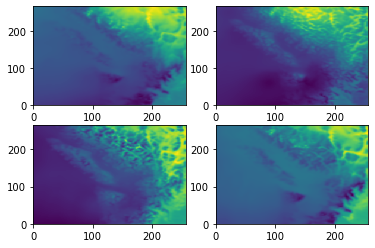

In [20]:
##some of the original data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(data2[0,:,:])
ax[0,1].pcolormesh(data2[8,:,:])
ax[1,0].pcolormesh(data2[16,:,:])
ax[1,1].pcolormesh(data2[24,:,:])


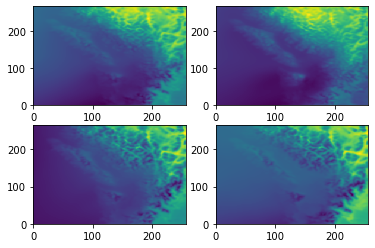

In [21]:
##transformed data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(data4[0,:,:])
ax[0,1].pcolormesh(data4[8,:,:])
ax[1,0].pcolormesh(data4[16,:,:])
ax[1,1].pcolormesh(data4[24,:,:])



## Removing the mean

In [63]:
avg = np.average(data2)
ctrd_data = data2 - avg
ctrd_data2 = transform(ctrd_data)
print(avg)
print(np.mean(ctrd_data2))

102418.15
-0.0595561292834748


In [65]:
pca2 = PCA(n_components = 3)
PCs2 = pca2.fit_transform(ctrd_data2)
eigvecs2 = pca2.components_
fracVar2 = pca2.explained_variance_ratio_

conponents2 = pca2.transform(ctrd_data2)
new_mat2 = pca2.inverse_transform(conponents)

data5 = reverse(new_mat2) + avg

102418.08888137067

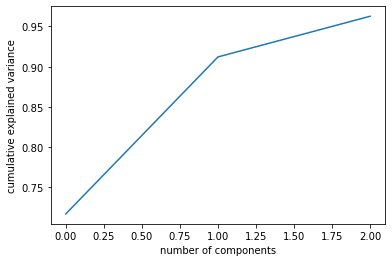

In [113]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

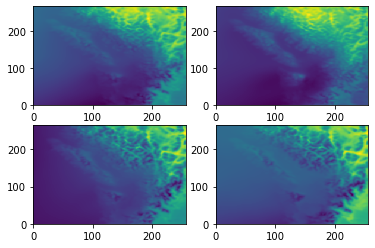

In [99]:
##transformed data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(data5[0,:,:])
ax[0,1].pcolormesh(data5[8,:,:])
ax[1,0].pcolormesh(data5[16,:,:])
colours = ax[1,1].pcolormesh(data5[24,:,:])

In [87]:
print(data4[1, 2, 3])
print(data5[1, 2, 3])
np.allclose(data4, data5, atol = 1)

101882.46617907725
101882.46617907725


True

## Removing Local Conditions

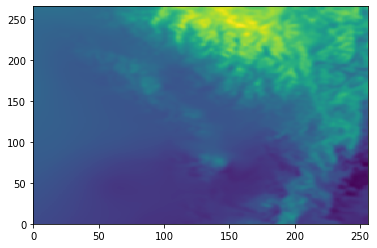

In [118]:
local_conditions = data2.mean(axis = 0)

data7 = data2 - local_conditions

plt.pcolormesh(data7[12])


In [120]:
data8 = transform(data7)
pca3 = PCA(n_components = 3)
PCs3 = pca3.fit_transform(data8)
eigvecs3 = pca3.components_
fracVar3 = pca3.explained_variance_ratio_

conponents3 = pca3.transform(data8)
new_mat3 = pca3.inverse_transform(conponents3)
data9 = reverse(new_mat3)
data10 = data9 + local_conditions

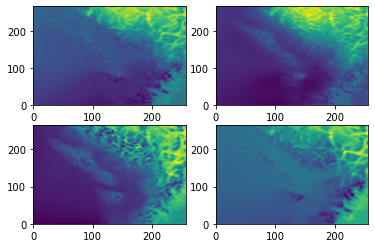

In [124]:
##transformed data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(data10[0,:,:])
ax[0,1].pcolormesh(data10[8,:,:])
ax[1,0].pcolormesh(data10[16,:,:])
ax[1,1].pcolormesh(data10[24,:,:])

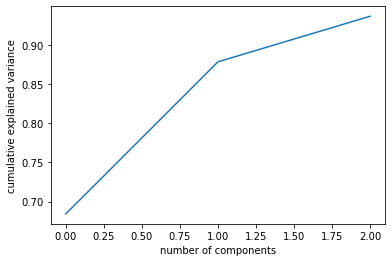

In [122]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [103]:
print(data5[1, 2, 3])
print(data9[1, 2, 3])
np.allclose(data4, data9, atol = 1)

101882.46617907725
101907.71773921707


False

## Winds

In [6]:
A = day1['u_wind'][0:24, 0:266, 0:256]
B = day2['u_wind'][0:24, 0:266, 0:256]
C = day3['u_wind'][0:24, 0:266, 0:256]

u_data = np.array( xr.concat([A, B, C], dim='time_counter')) 

A = day1['v_wind'][0:24, 0:266, 0:256]
B = day2['v_wind'][0:24, 0:266, 0:256]
C = day3['v_wind'][0:24, 0:266, 0:256]

v_data = np.array( xr.concat([A, B, C], dim='time_counter')) 

In [15]:
u_mat = transform(u_data)
v_mat = transform(v_data)
c_mat = np.concatenate((u_mat,v_mat), axis=0)
c_mat.shape

(136192, 72)

In [34]:
pca4 = PCA(n_components = 10)
PCs4 = pca4.fit_transform(c_mat)
eigvecs4 = pca4.components_
fracVar4 = pca4.explained_variance_ratio_


conp = pca4.transform(c_mat)
new_mat4 = pca4.inverse_transform(conp)
new_u = reverse(new_mat4[0:266*256,:])
new_v = reverse(new_mat4[266*256:2*266*256,:])

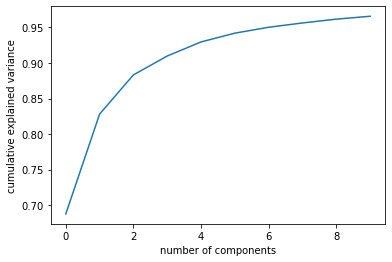

In [41]:
plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

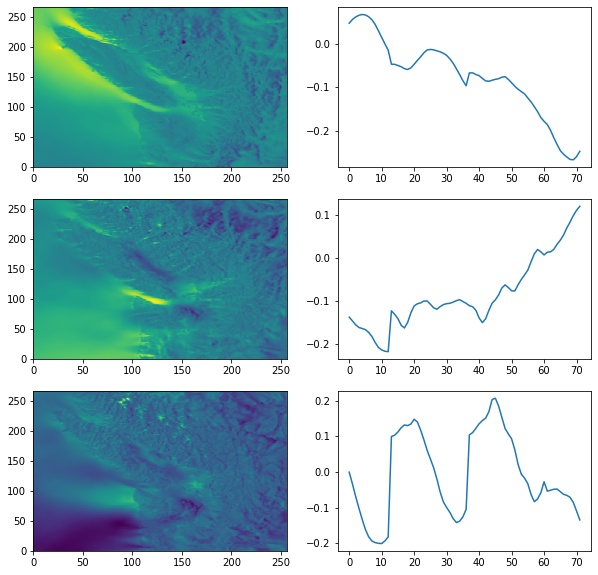

In [30]:
#displaying first 3 principle conponents (showing u_winds) and time-loading
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
mode0 = PCs4[0:256*266, 0].reshape(266,256)
mode1 = PCs4[0:256*266:, 1].reshape(266,256)
mode2 = PCs4[0:256*266:, 2].reshape(266,256)
ax[0, 0].pcolormesh(mode0)
ax[0, 1].plot(eigvecs4[0])
ax[1, 0].pcolormesh(mode1)
ax[1, 1].plot(eigvecs4[1])
ax[2, 0].pcolormesh(mode2)
ax[2, 1].plot(eigvecs4[2])

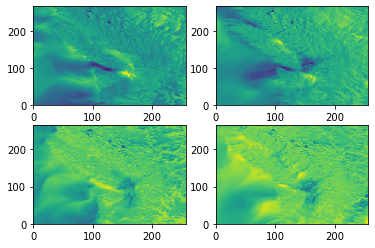

In [32]:
##some of the original data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(u_data[0,:,:])
ax[0,1].pcolormesh(u_data[12,:,:])
ax[1,0].pcolormesh(v_data[0,:,:])
ax[1,1].pcolormesh(v_data[12,:,:])


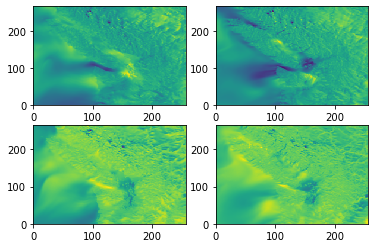

In [33]:
##some of the original data
fig, ax = plt.subplots(2, 2)
ax[0,0].pcolormesh(new_u[0,:,:])
ax[0,1].pcolormesh(new_u[12,:,:])
ax[1,0].pcolormesh(new_v[0,:,:])
ax[1,1].pcolormesh(new_v[12,:,:])